In [2]:
import pandas as pd

#### Look first 100 rows

In [3]:
articles_100 = pd.read_csv('data/articles.csv', nrows=100)
customers_100 = pd.read_csv('data/customers.csv', nrows=100)
transactions_100 = pd.read_csv('data/transactions.csv', nrows=100)

In [3]:
print('Article columns: ', articles_100.columns)
print('Customer columns: ', customers_100.columns)
print('Transaction columns: ', transactions_100.columns)

Article columns:  Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')
Customer columns:  Index(['customer_id', 'club_member_status', 'fashion_news_frequency', 'age'], dtype='object')
Transaction columns:  Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')


#### Slice Transactions

Number of total transactions 31788324. We use last 5 million.

In [2]:
data = pd.read_csv('transactions.csv', skiprows=26_788_324, header=None)
# transactions_small = pd.DataFrame(data=data, columns=['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'])
transactions_small = data.rename(columns={0:'t_dat', 1:'customer_id', 2:'article_id', 3:'price', 4:'sales_channel_id'})
transactions_small.to_csv('transactions_5m.csv', index=False)

#### Investigate Duplicates

In [3]:
transactions = pd.read_csv('data/transactions.csv')

duplicates_first = transactions.duplicated(['customer_id', 'article_id'])
duplicates_false = transactions.duplicated(['customer_id', 'article_id'], keep=False)

print(duplicates_first.sum(), duplicates_false.sum())

4481885 7997298


#### Investigate Price and Number of Purchases

In [3]:
transactions = pd.read_csv('transactions.csv')
print(transactions.price.min(), transactions.price.max())

1.694915254237288e-05 0.5915254237288136


What does the price column refers to?

In [5]:
transactions.sales_channel_id.value_counts()

2    22379862
1     9408462
Name: sales_channel_id, dtype: int64

Most probably 2 is mobile and 1 is web

In [4]:
transactions_sumprice_gb = transactions.groupby(["customer_id", "article_id"])['price'].sum()

print(transactions_sumprice_gb.reset_index()['price'].max(), 
transactions_sumprice_gb.reset_index()['price'].min())

del transactions_sumprice_gb

11.082898305084743 5.084745762711864e-05


In [5]:
transactions_count_gb = transactions.groupby(["customer_id", "article_id"])['price'].count()

print(transactions_count_gb.reset_index()['price'].max(), 
transactions_count_gb.reset_index()['price'].min())

del transactions_count_gb

570 1


In [ ]:
# Data Sparcity
transactions.__len__() / (transactions.customer_id.nunique() * transactions.article_id.nunique())

0.00022319751563642373

#### Time Series

In [ ]:
transactions_count_gb_date = transactions.groupby(['t_dat'])['price'].count()
transactions_sum_gb_date = transactions.groupby(['t_dat'])['price'].sum()

<AxesSubplot:xlabel='Dates'>

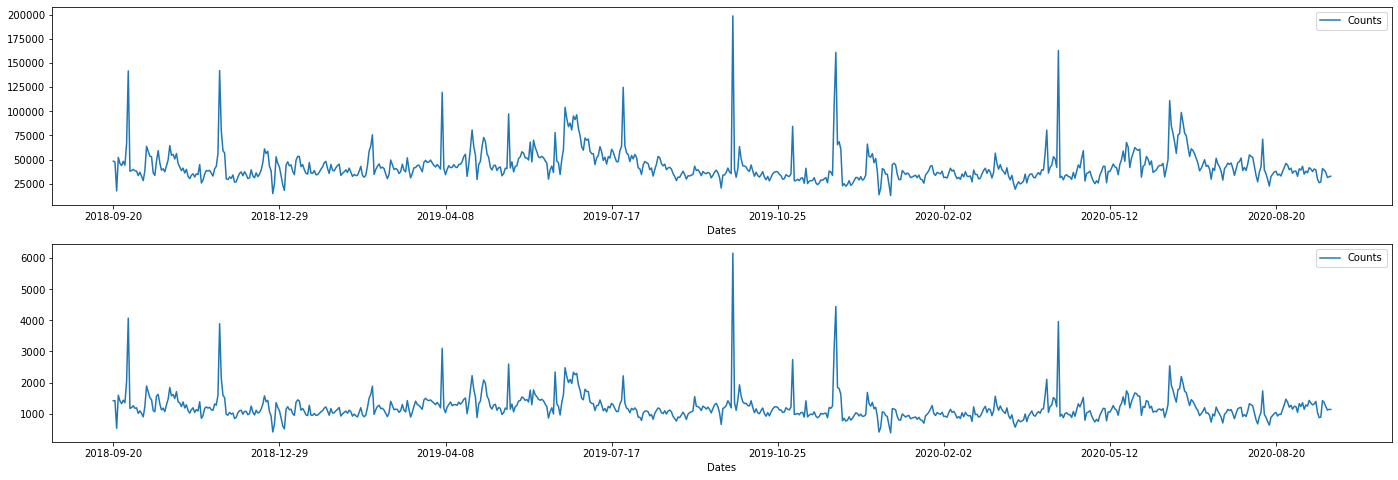

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1)

# Plot of transaction counts
transactions.t_dat.value_counts().rename_axis('Dates').reset_index(name='Counts').sort_values(by='Dates').plot(x='Dates', figsize=(24,8), ax=axes[0])

# Plot of price sums
transactions.groupby(['t_dat'])['price'].sum().rename_axis('Dates').reset_index(name='Counts').sort_values(by='Dates').plot(x='Dates', figsize=(24,8), ax=axes[1])

- The week to be evaluated not in Kasim bump.
- Even in Kasim, there is not a bump actually.
- Since the price is normalized, there is no difference visually between two plots.